In [10]:
import pickle
import h5py
import yaml
import matplotlib.pyplot as plt

from src.Model import *
from run import *
from src.InferSent import InferSent

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
type_embeddings_file = 'data/type_embeddings.pickle'
sub_words_emb_file = 'data/_subwords_embeddings.h5py'
infer_sent_file = 'data/infersent1.pkl'
glove_file = 'data/glove.840B.300d.txt'
targets_file = 'data/_targets.h5py'

In [6]:
targets = h5py.File(targets_file, 'r')
type_to_ix = yaml.load(targets['targets'].attrs['type_to_ix'])
types = [t.replace('-', ' ').replace('_', ' ').strip() for t in type_to_ix]

/home/alex/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


In [34]:
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': 1}
infersent = InferSent(params_model)
infersent.load_state_dict(torch.load(infer_sent_file))
infersent.set_w2v_path(glove_file)
infersent.build_vocab(types, tokenize=True)

Found 128(/129) words with w2v vectors
Vocab size : 128


In [12]:
embeddings = infersent.encode(types, tokenize=True)

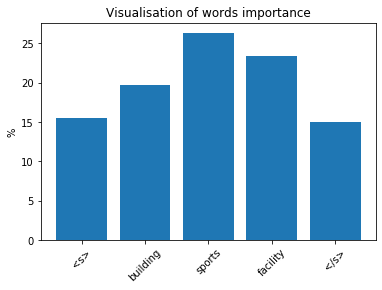

(tensor([[ 0.0028, -0.0254,  0.0038,  ..., -0.0096, -0.0073, -0.0289]],
        grad_fn=<MaxBackward0>),
 array([[2, 3, 1, ..., 1, 1, 4]]))

In [32]:
infersent.visualize(types[15], tokenize=True)

In [6]:
model = FigmentModel(sub_words_emb_file=sub_words_emb_file, sub_words_num_emb=143123, sub_words_emb_dim=200, clr_num_emb=83, clr_emb_dim=10, seed=23455)

In [7]:
model.load_state_dict(torch.load('output/model.pt'))

<All keys matched successfully>

In [35]:
infersent

InferSent(
  (enc_lstm): LSTM(300, 2048, bidirectional=True)
)